# Spatiotemporal Representation: Unifying Space and Time

## Overview

In this section, we'll explore the spatiotemporal representation of visual stimuli - a unified framework that combines spatial and temporal dimensions. This representation is central to understanding motion energy models and how the brain processes motion.

### What we'll cover:
- The concept of spatiotemporal space (x, y, t)
- Creating and visualizing 3D stimuli in space-time
- Spatiotemporal slicing techniques
- Motion trajectories in space-time
- The spatiotemporal frequency domain
- Connections to neural mechanisms of motion perception

## Setting Up

Let's import the libraries we'll need for this section.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, cm
from mpl_toolkits.mplot3d import Axes3D
import scipy.signal as signal
import sys

# Add the utils package to the path
sys.path.append('../../..')
try:
    from motionenergy.utils import stimuli_generation, visualization
except ImportError:
    print("Note: utils modules not found. This is expected if you haven't implemented them yet.")

# For interactive plots
%matplotlib inline
from IPython.display import HTML, display

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## 1. Introduction to Spatiotemporal Representation

Throughout this course, we've been exploring visual stimuli in both space and time. Now, we'll bring these dimensions together in a unified framework: the spatiotemporal representation.

### What is Spatiotemporal Representation?

Spatiotemporal representation refers to a way of describing visual information that integrates both spatial coordinates (x, y) and time (t) into a single 3D space. In this framework:

- Each point (x, y, t) represents the intensity or color at a specific spatial location and time
- A static image is a 2D slice of this space at a fixed time
- A video is a 3D volume in this space
- Motion appears as oriented structures in this space

This representation is powerful because it allows us to see patterns and structures that might not be apparent when looking at individual frames or spatial slices.

### Example: From 2D Frames to 3D Volume

Let's see how a sequence of 2D frames can be stacked to create a 3D spatiotemporal volume:

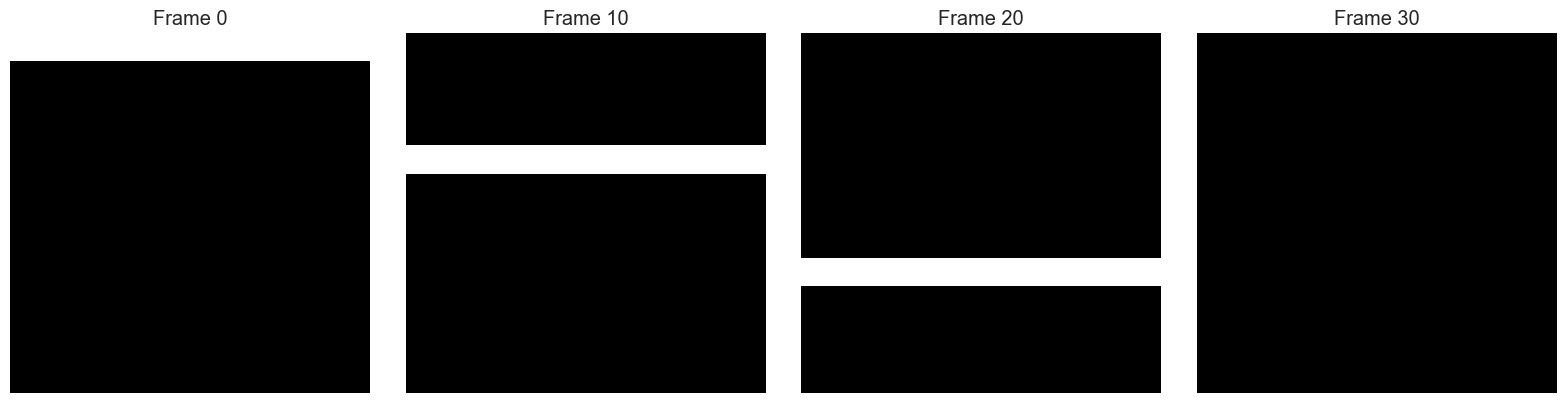

In [2]:
def create_simple_moving_bar(width=64, height=64, n_frames=32, bar_width=5):
    """Create a simple horizontal bar moving downward."""
    # Create an empty volume
    volume = np.zeros((n_frames, height, width))
    
    # For each frame, place a bar at an increasing y position
    for t in range(n_frames):
        y_pos = int(t * height / n_frames)
        if y_pos < height - bar_width:
            volume[t, y_pos:y_pos+bar_width, :] = 1.0
    
    return volume

# Create a simple moving bar stimulus
bar_stimulus = create_simple_moving_bar()

# Display a few frames from the sequence
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
frame_indices = [0, 10, 20, 30]

for i, ax in enumerate(axes):
    ax.imshow(bar_stimulus[frame_indices[i]], cmap='gray')
    ax.set_title(f'Frame {frame_indices[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

### Visualizing in 3D Space

Now, let's visualize this same stimulus as a 3D volume to understand how motion appears in spatiotemporal space:

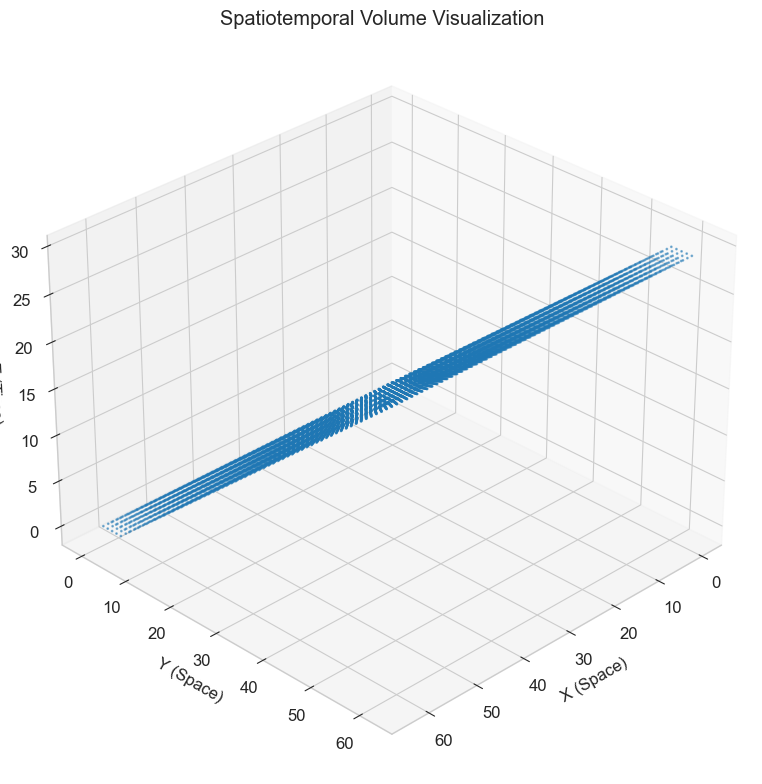

In [3]:
def visualize_volume(volume, threshold=0.5):
    """Visualize a 3D volume using a scatter plot with points where values exceed threshold."""
    # Get coordinates where volume values exceed threshold
    coords = np.where(volume > threshold)
    
    # Create 3D figure
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot points with small marker size for visualization
    ax.scatter(coords[2], coords[1], coords[0], s=1, alpha=0.5)
    
    # Set labels
    ax.set_xlabel('X (Space)')
    ax.set_ylabel('Y (Space)')
    ax.set_zlabel('T (Time)')
    
    # Set more informative viewpoint
    ax.view_init(elev=30, azim=45)
    
    plt.title('Spatiotemporal Volume Visualization')
    plt.tight_layout()
    plt.show()

# Visualize our moving bar stimulus
visualize_volume(bar_stimulus)

In this 3D visualization, you can see that our moving horizontal bar appears as a slanted plane or sheet in spatiotemporal space. This is a fundamental insight: **in spatiotemporal space, motion appears as oriented structures**.

- The direction of motion determines the orientation of the structure in space-time
- The speed of motion determines the slope of the structure
- Faster motion creates a more horizontal structure (covering more space in less time)
- Slower motion creates a more vertical structure (covering less space over more time)

## 2. Space-Time Slices: Understanding Motion Trajectories

A powerful way to analyze spatiotemporal data is to extract 2D slices from the 3D volume. There are three main types of slices we can extract:

1. **xy-slice**: A conventional frame at a specific time (t = constant)
2. **xt-slice**: A slice showing how a horizontal line of pixels changes over time (y = constant)
3. **yt-slice**: A slice showing how a vertical line of pixels changes over time (x = constant)

The xt and yt slices are particularly useful for analyzing motion, as they reveal motion trajectories in a compact 2D representation.

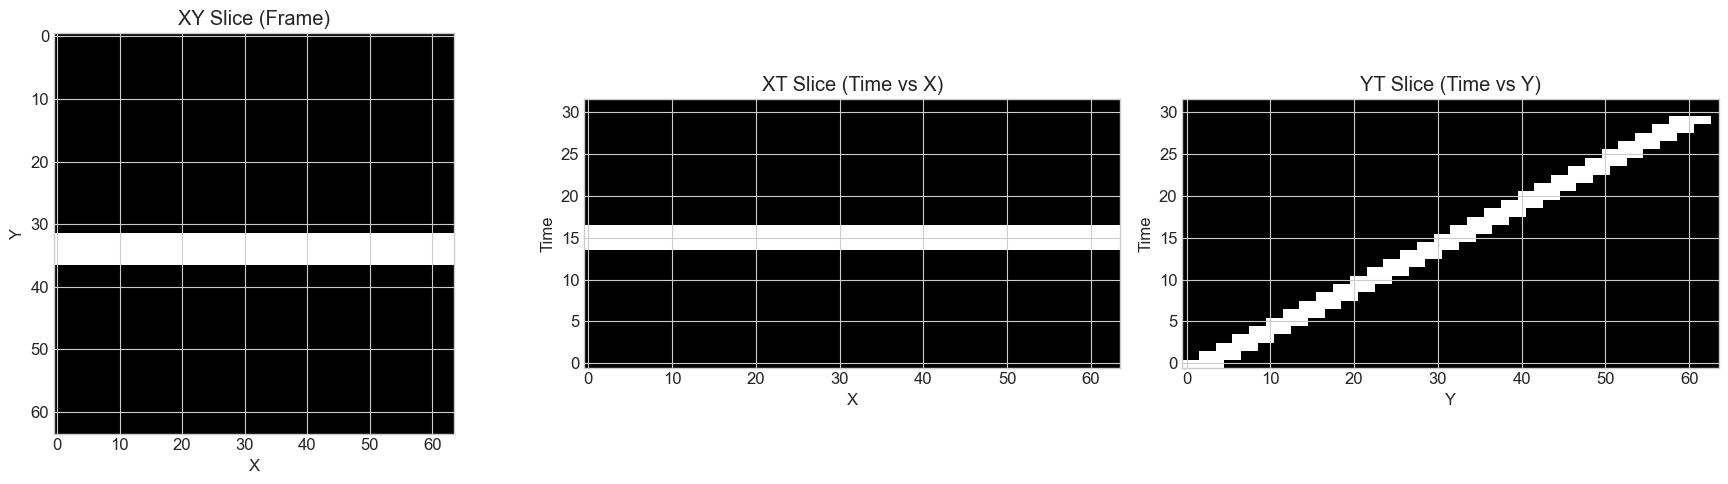

In [4]:
def extract_and_visualize_slices(volume):
    """Extract and visualize the three types of slices from a spatiotemporal volume."""
    # Get dimensions
    n_frames, height, width = volume.shape
    
    # Extract middle slices
    xy_slice = volume[n_frames//2, :, :]  # Frame from the middle of the sequence
    xt_slice = volume[:, height//2, :]    # How a horizontal line changes over time
    yt_slice = volume[:, :, width//2]     # How a vertical line changes over time
    
    # Visualize slices
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # XY slice (normal frame)
    axes[0].imshow(xy_slice, cmap='gray')
    axes[0].set_title('XY Slice (Frame)')
    axes[0].set_xlabel('X')
    axes[0].set_ylabel('Y')
    
    # XT slice
    axes[1].imshow(xt_slice, cmap='gray', origin='lower')
    axes[1].set_title('XT Slice (Time vs X)')
    axes[1].set_xlabel('X')
    axes[1].set_ylabel('Time')
    
    # YT slice
    axes[2].imshow(yt_slice, cmap='gray', origin='lower')
    axes[2].set_title('YT Slice (Time vs Y)')
    axes[2].set_xlabel('Y')
    axes[2].set_ylabel('Time')
    
    plt.tight_layout()
    plt.show()

# Extract and visualize slices from our moving bar stimulus
extract_and_visualize_slices(bar_stimulus)

In these visualizations, notice that:

1. The **xy-slice** shows a single frame with a horizontal bar
2. The **xt-slice** shows vertical lines, indicating that at a fixed y position, bars appear at all x positions at particular times
3. The **yt-slice** shows diagonal lines with a positive slope, indicating downward motion over time (increasing y with increasing t)

The slope of the line in the yt-slice directly relates to the vertical velocity of the bar: slope = Δy/Δt = velocity. This is a fundamental principle in spatiotemporal analysis.

### Different Motion Patterns in Space-Time

Let's now examine how different motion patterns appear in spatiotemporal slices:

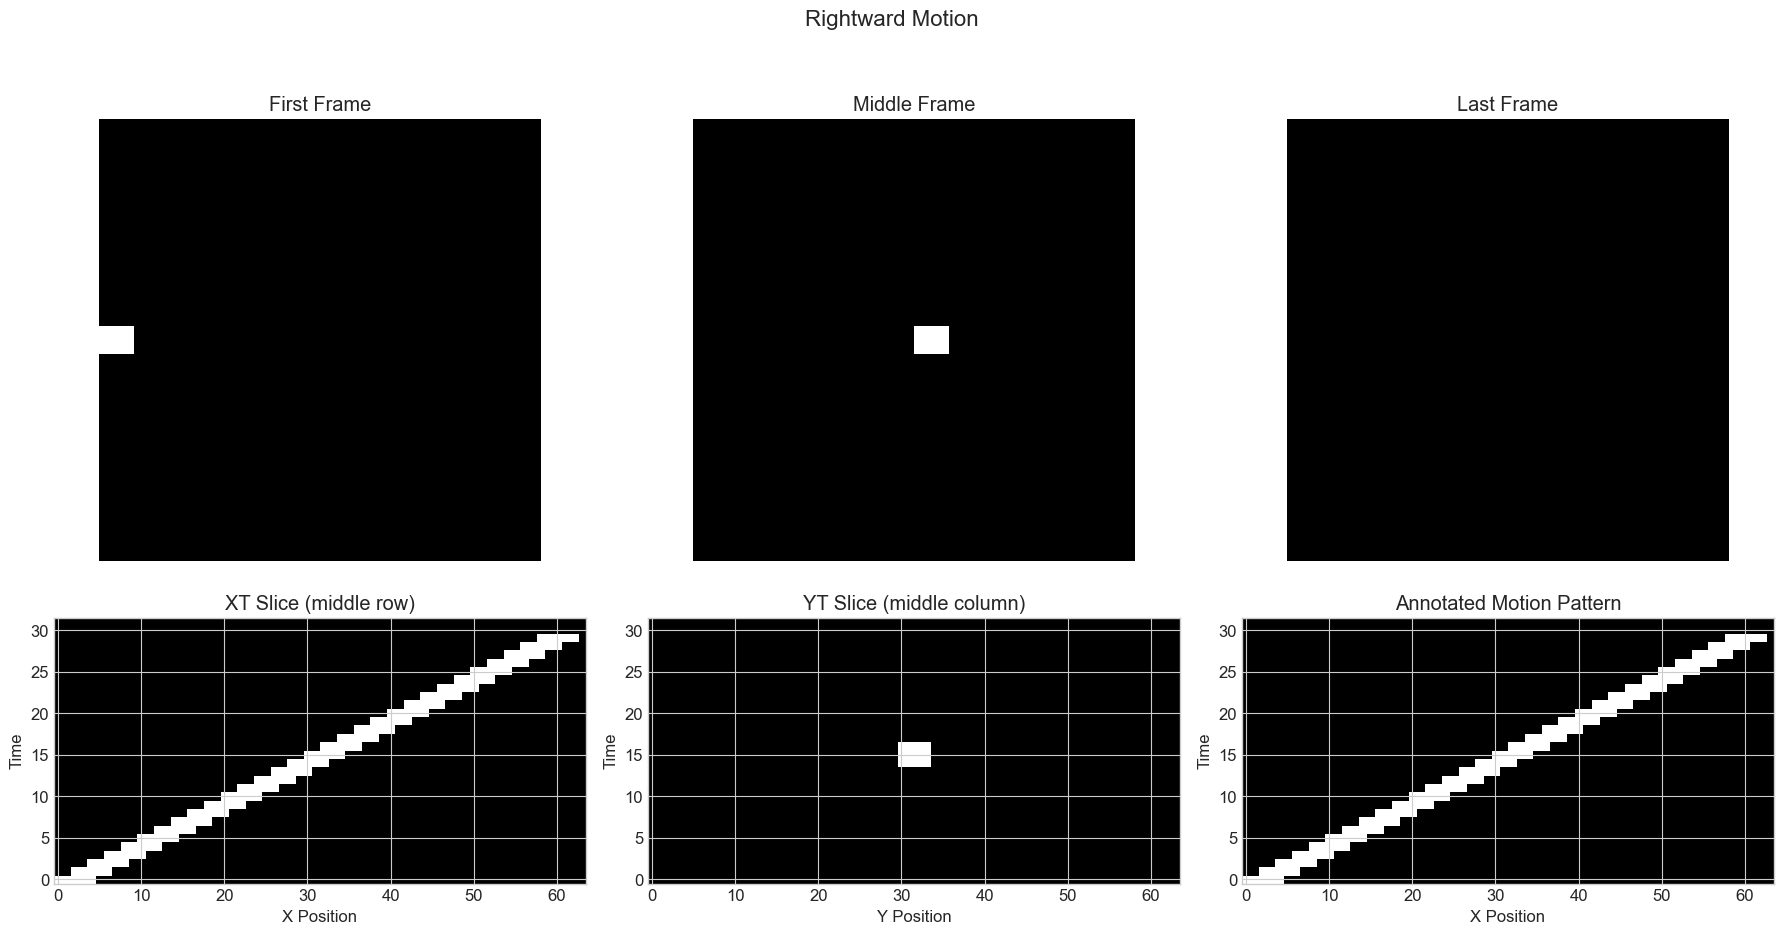

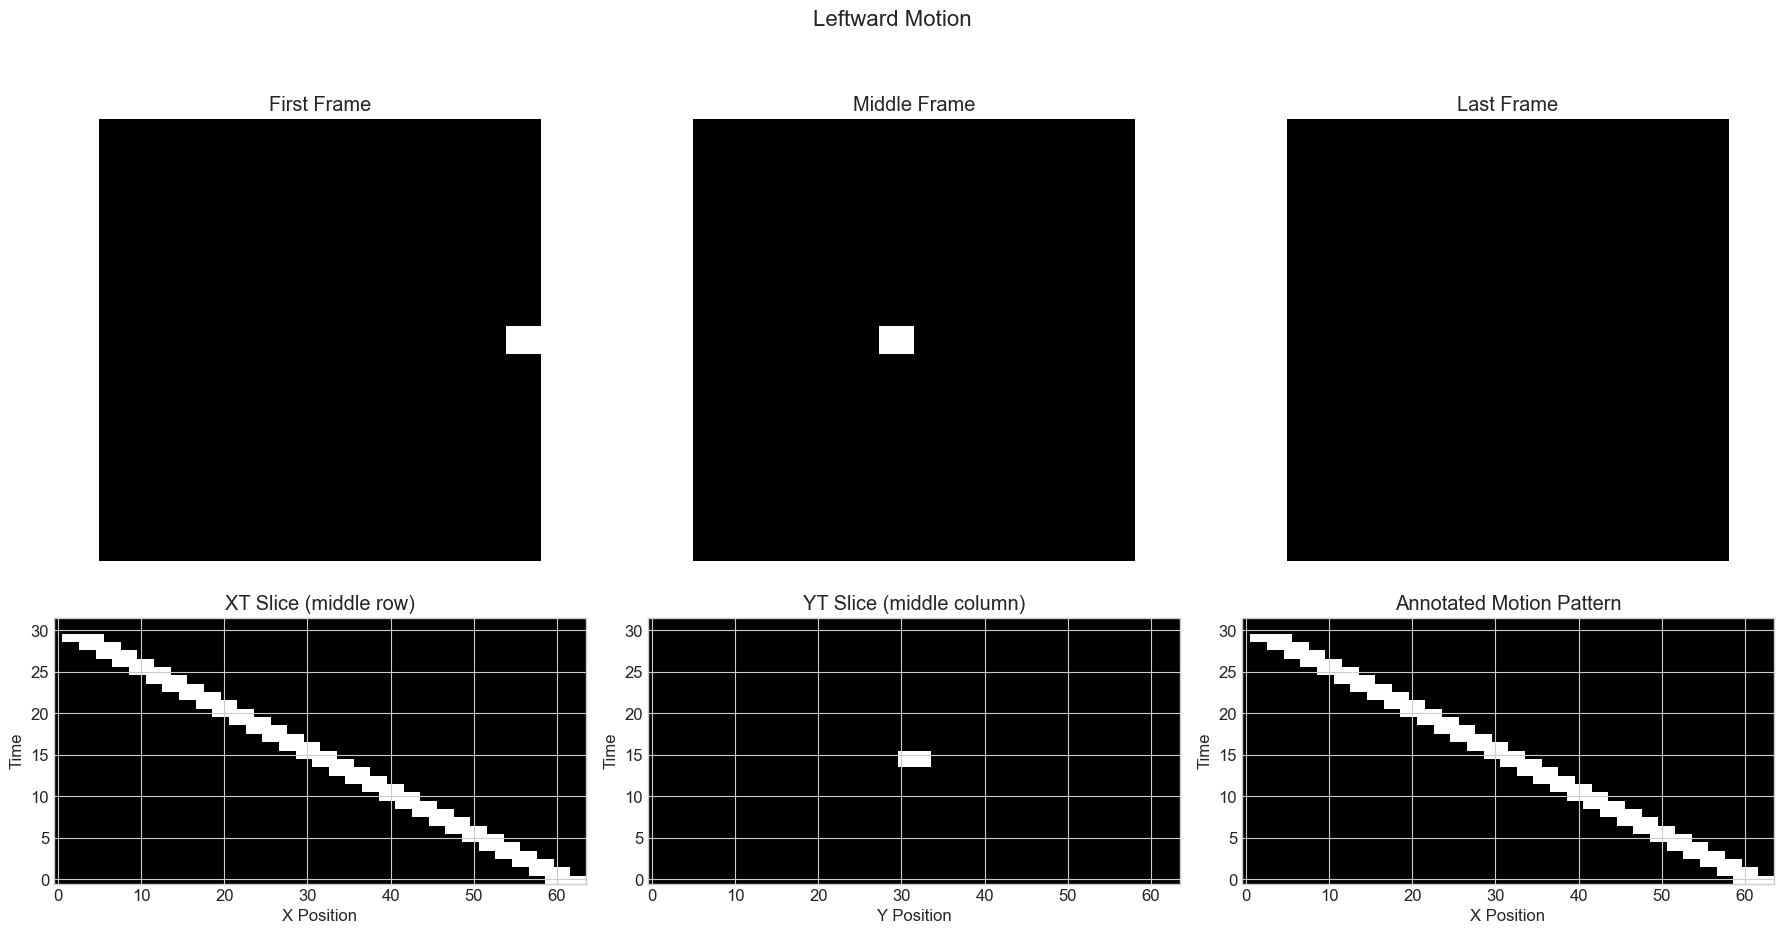

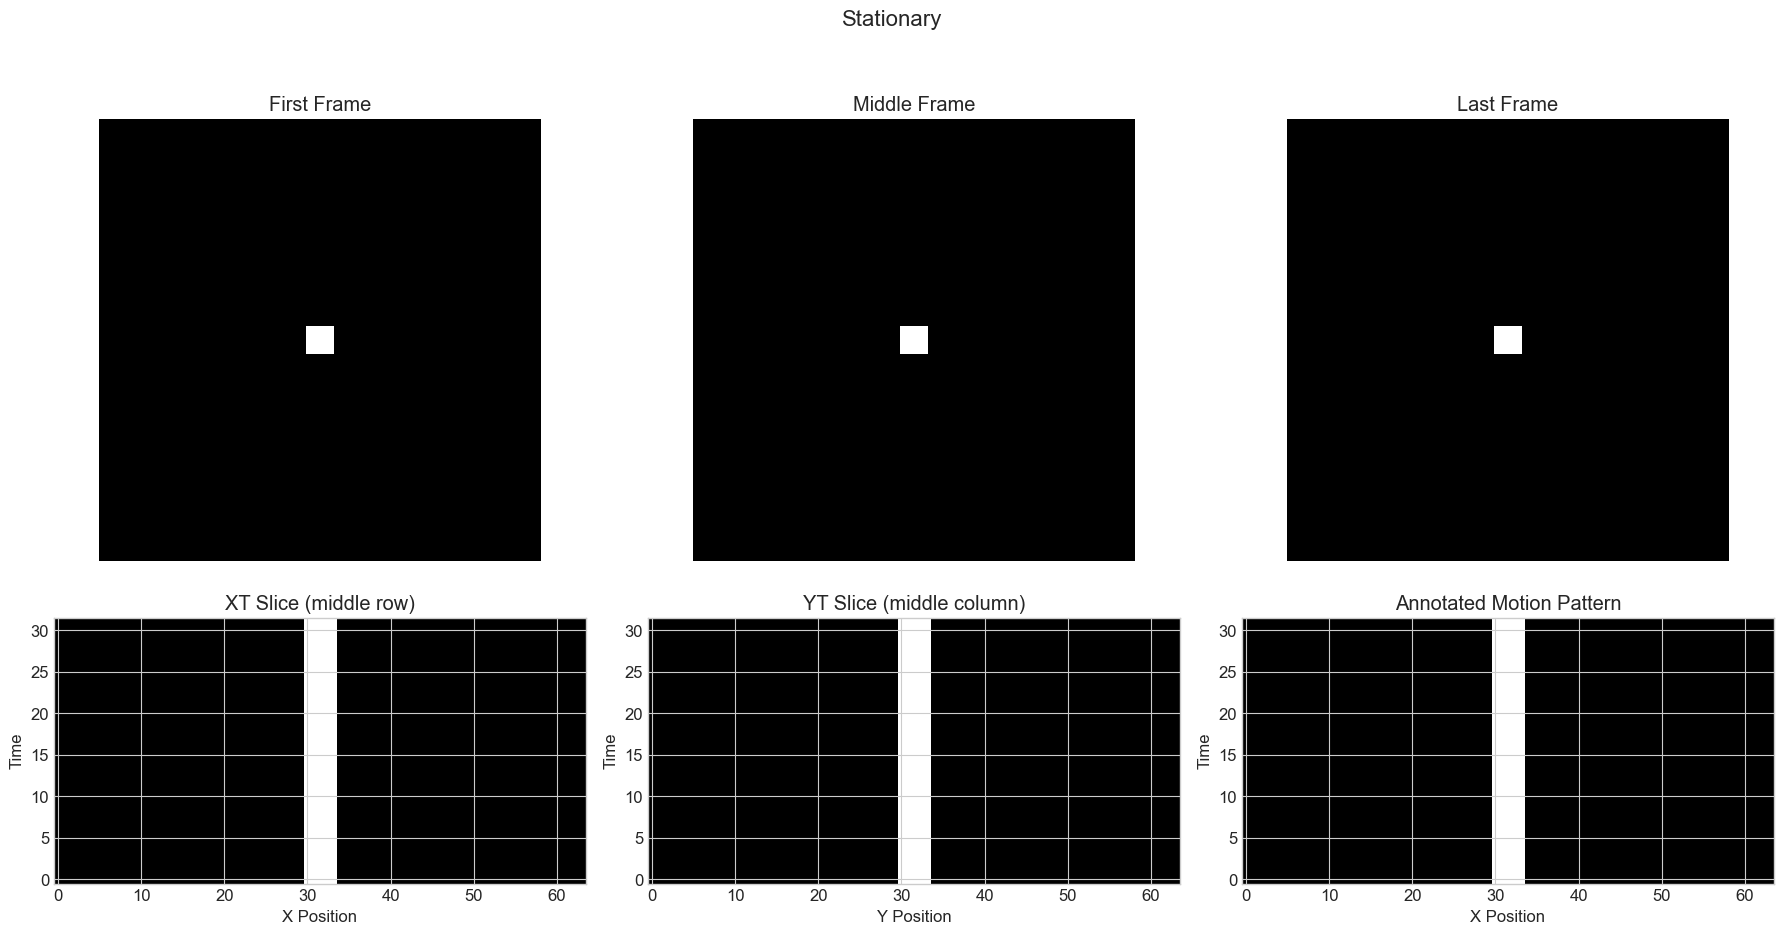

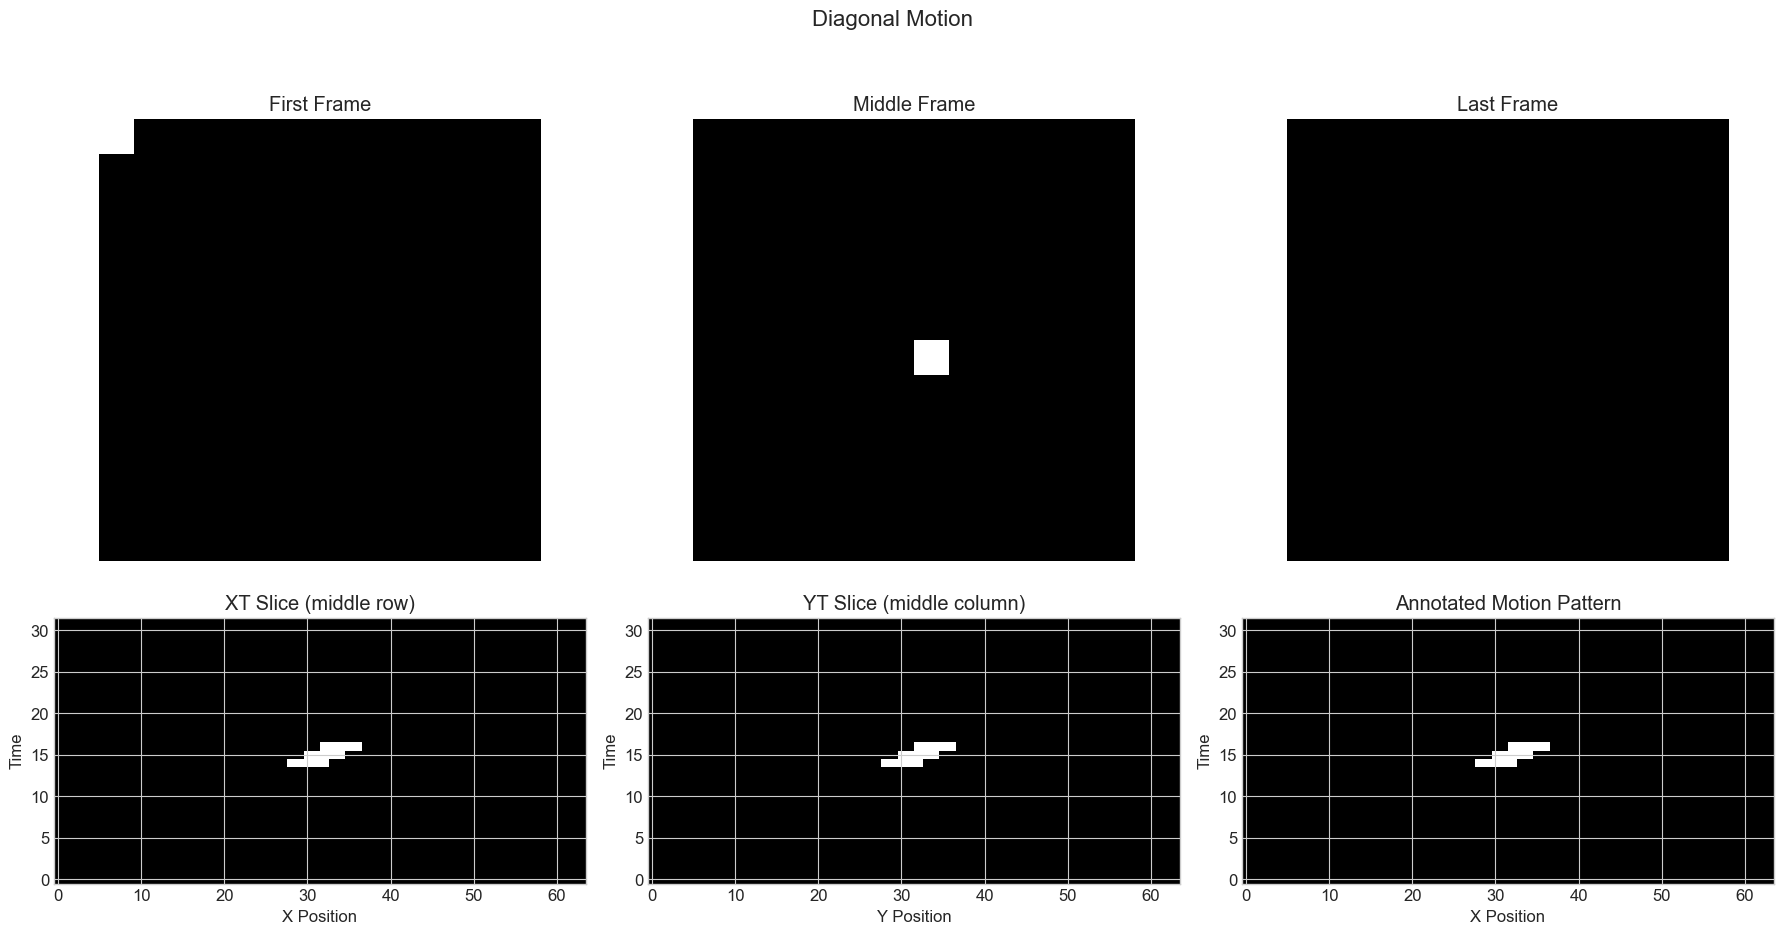

In [5]:
def create_motion_examples(width=64, height=64, n_frames=32):
    """Create various motion patterns and their spatiotemporal slices."""
    # Create empty volumes
    rightward = np.zeros((n_frames, height, width))
    leftward = np.zeros((n_frames, height, width))
    stationary = np.zeros((n_frames, height, width))
    diagonal = np.zeros((n_frames, height, width))
    
    # Parameters
    bar_height = 5
    bar_width = 5
    
    # Create motions
    for t in range(n_frames):
        # Rightward motion (horizontal bar moving right)
        x_pos = int(t * width / n_frames)
        if x_pos < width - bar_width:
            rightward[t, height//2-bar_height//2:height//2+bar_height//2, x_pos:x_pos+bar_width] = 1.0
        
        # Leftward motion (horizontal bar moving left)
        x_pos = width - int(t * width / n_frames) - bar_width
        if x_pos >= 0:
            leftward[t, height//2-bar_height//2:height//2+bar_height//2, x_pos:x_pos+bar_width] = 1.0
        
        # Stationary (bar that doesn't move)
        stationary[t, height//2-bar_height//2:height//2+bar_height//2, width//2-bar_width//2:width//2+bar_width//2] = 1.0
        
        # Diagonal motion (bar moving diagonally)
        x_pos = int(t * width / n_frames)
        y_pos = int(t * height / n_frames)
        if x_pos < width - bar_width and y_pos < height - bar_height:
            diagonal[t, y_pos:y_pos+bar_height, x_pos:x_pos+bar_width] = 1.0
    
    return rightward, leftward, stationary, diagonal

# Create motion examples
rightward, leftward, stationary, diagonal = create_motion_examples()

# Function to analyze one motion type
def analyze_motion(volume, title):
    """Show frames and xt/yt slices for a specific motion type."""
    n_frames, height, width = volume.shape
    
    # Create figure
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    plt.suptitle(title, fontsize=16)
    
    # Show first and last frames
    axes[0, 0].imshow(volume[0], cmap='gray')
    axes[0, 0].set_title('First Frame')
    axes[0, 0].axis('off')
    
    axes[0, 1].imshow(volume[n_frames//2], cmap='gray')
    axes[0, 1].set_title('Middle Frame')
    axes[0, 1].axis('off')
    
    axes[0, 2].imshow(volume[-1], cmap='gray')
    axes[0, 2].set_title('Last Frame')
    axes[0, 2].axis('off')
    
    # Show xt slice
    xt_slice = volume[:, height//2, :]
    axes[1, 0].imshow(xt_slice, cmap='gray', origin='lower')
    axes[1, 0].set_title('XT Slice (middle row)')
    axes[1, 0].set_xlabel('X Position')
    axes[1, 0].set_ylabel('Time')
    
    # Show yt slice
    yt_slice = volume[:, :, width//2]
    axes[1, 1].imshow(yt_slice, cmap='gray', origin='lower')
    axes[1, 1].set_title('YT Slice (middle column)')
    axes[1, 1].set_xlabel('Y Position')
    axes[1, 1].set_ylabel('Time')
    
    # Annotated xt slice
    axes[1, 2].imshow(xt_slice, cmap='gray', origin='lower')
    axes[1, 2].set_title('Annotated Motion Pattern')
    axes[1, 2].set_xlabel('X Position')
    axes[1, 2].set_ylabel('Time')
    
    # Add a diagram showing motion slope
    # This would be specific to each motion type
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Analyze each motion type
for volume, title in zip([rightward, leftward, stationary, diagonal], 
                        ['Rightward Motion', 'Leftward Motion', 'Stationary', 'Diagonal Motion']):
    analyze_motion(volume, title)

In these visualizations, observe the different patterns in the xt and yt slices:

1. **Rightward motion**: In the xt-slice, we see a diagonal line with positive slope (motion from left to right)
2. **Leftward motion**: In the xt-slice, we see a diagonal line with negative slope (motion from right to left)
3. **Stationary**: In both xt and yt slices, we see vertical lines (no change in position over time)
4. **Diagonal motion**: Both xt and yt slices show diagonal lines (both x and y positions change over time)

These patterns illustrate the fundamental relationship between **motion direction and velocity** and the **orientation of patterns in space-time**.

## 3. Velocity in Spatiotemporal Space

One of the most powerful insights from spatiotemporal representation is the relationship between velocity and orientation in space-time. Let's explore this relationship more systematically.

### Velocity as Orientation

In spatiotemporal space, velocity is represented by the orientation (slope) of structures:

- For horizontal motion (along x), the velocity is the slope in the xt-plane: $v_x = \frac{\Delta x}{\Delta t}$
- For vertical motion (along y), the velocity is the slope in the yt-plane: $v_y = \frac{\Delta y}{\Delta t}$
- For arbitrary 2D motion, the velocity is a 2D vector $(v_x, v_y)$ that defines the orientation of a plane in 3D space-time

Let's visualize how different velocities appear in space-time:

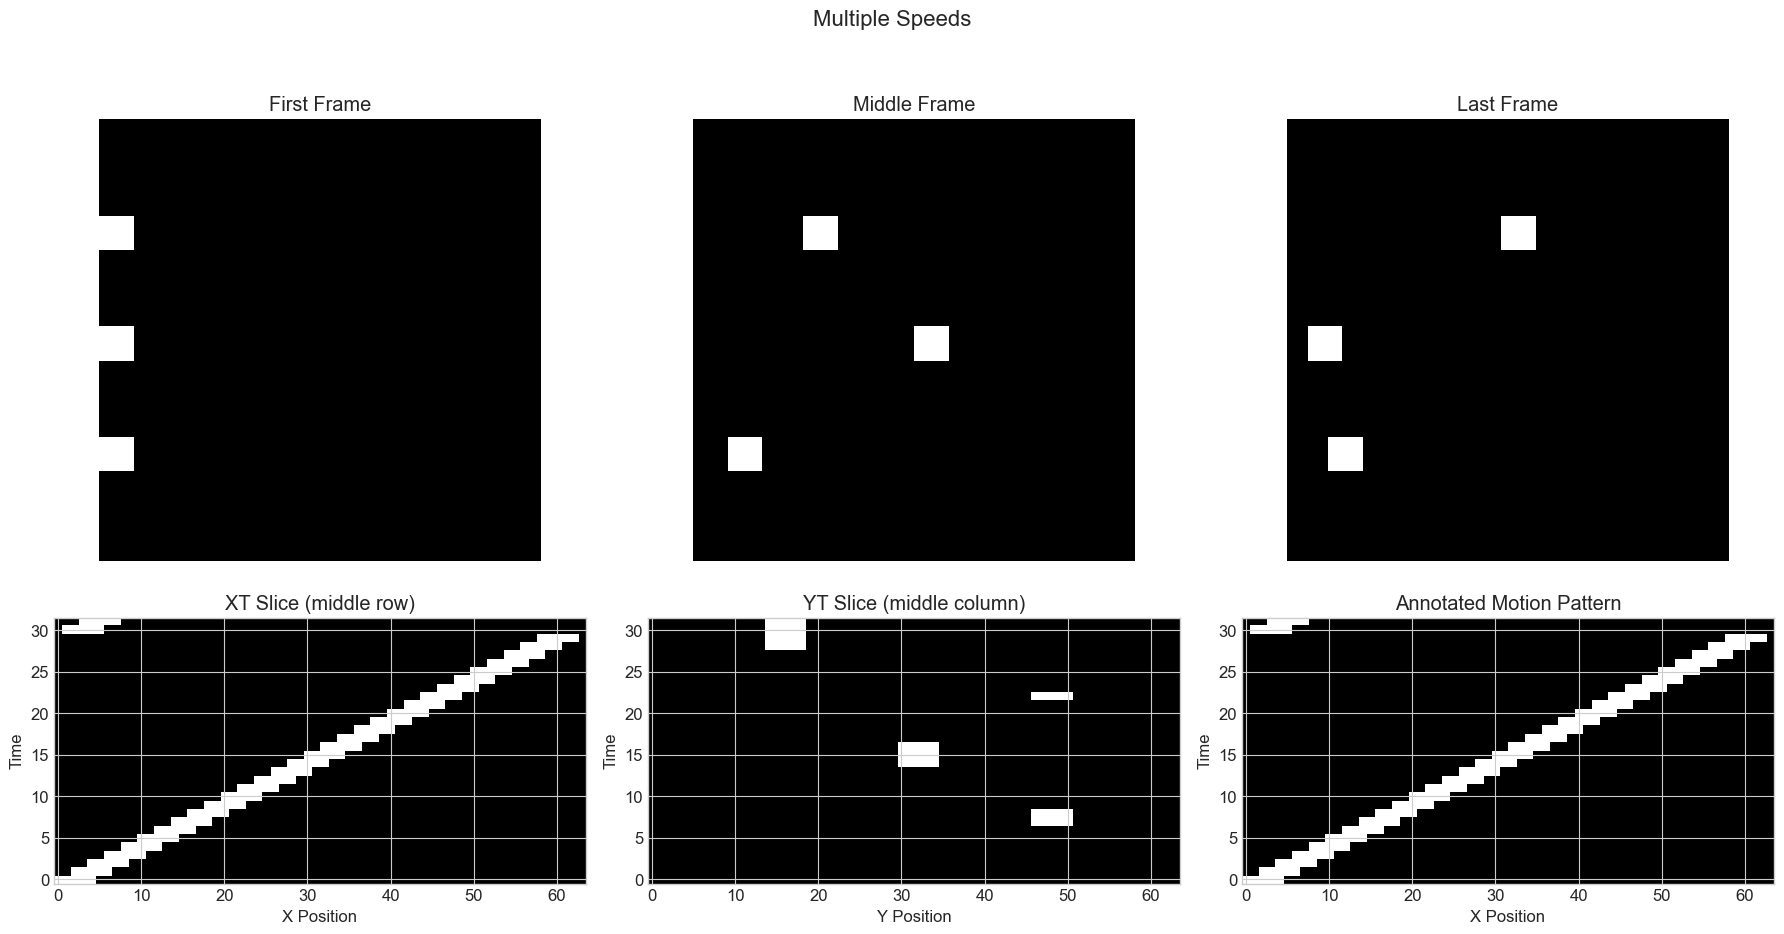

In [6]:
def create_multi_speed_bars(width=64, height=64, n_frames=32, speeds=[0.5, 1.0, 2.0]):
    """Create a stimulus with bars moving at different speeds."""
    # Create empty volume
    volume = np.zeros((n_frames, height, width))
    
    # Bar dimensions
    bar_width = 5
    bar_height = 5
    
    # Gap between bars
    gap = height // (len(speeds) + 1)
    
    # Create bars at different vertical positions, moving at different speeds
    for i, speed in enumerate(speeds):
        y_pos = (i + 1) * gap - bar_height // 2
        
        for t in range(n_frames):
            # Calculate x position based on speed
            x_pos = int(t * speed * width / n_frames) % (width - bar_width)
            volume[t, y_pos:y_pos+bar_height, x_pos:x_pos+bar_width] = 1.0
    
    return volume

# Create and analyze multi-speed stimulus
multi_speed = create_multi_speed_bars(speeds=[0.5, 1.0, 2.0])
analyze_motion(multi_speed, 'Multiple Speeds')

In the xt-slice, you can see three diagonal lines with different slopes, corresponding to the three different speeds:

- The **steepest line** represents the **slowest speed** (slope ≈ Δt/Δx = 1/speed)
- The **flattest line** represents the **fastest speed** (covering more distance in the same time)

This relationship between velocity and orientation in space-time is fundamental to how motion energy models work.

### The Aperture Problem in Space-Time

The aperture problem is a fundamental challenge in motion perception: when viewing motion through a small aperture, the true direction of motion can be ambiguous. This problem has an elegant interpretation in spatiotemporal space.

Let's create a moving oriented edge and analyze its spatiotemporal signature:

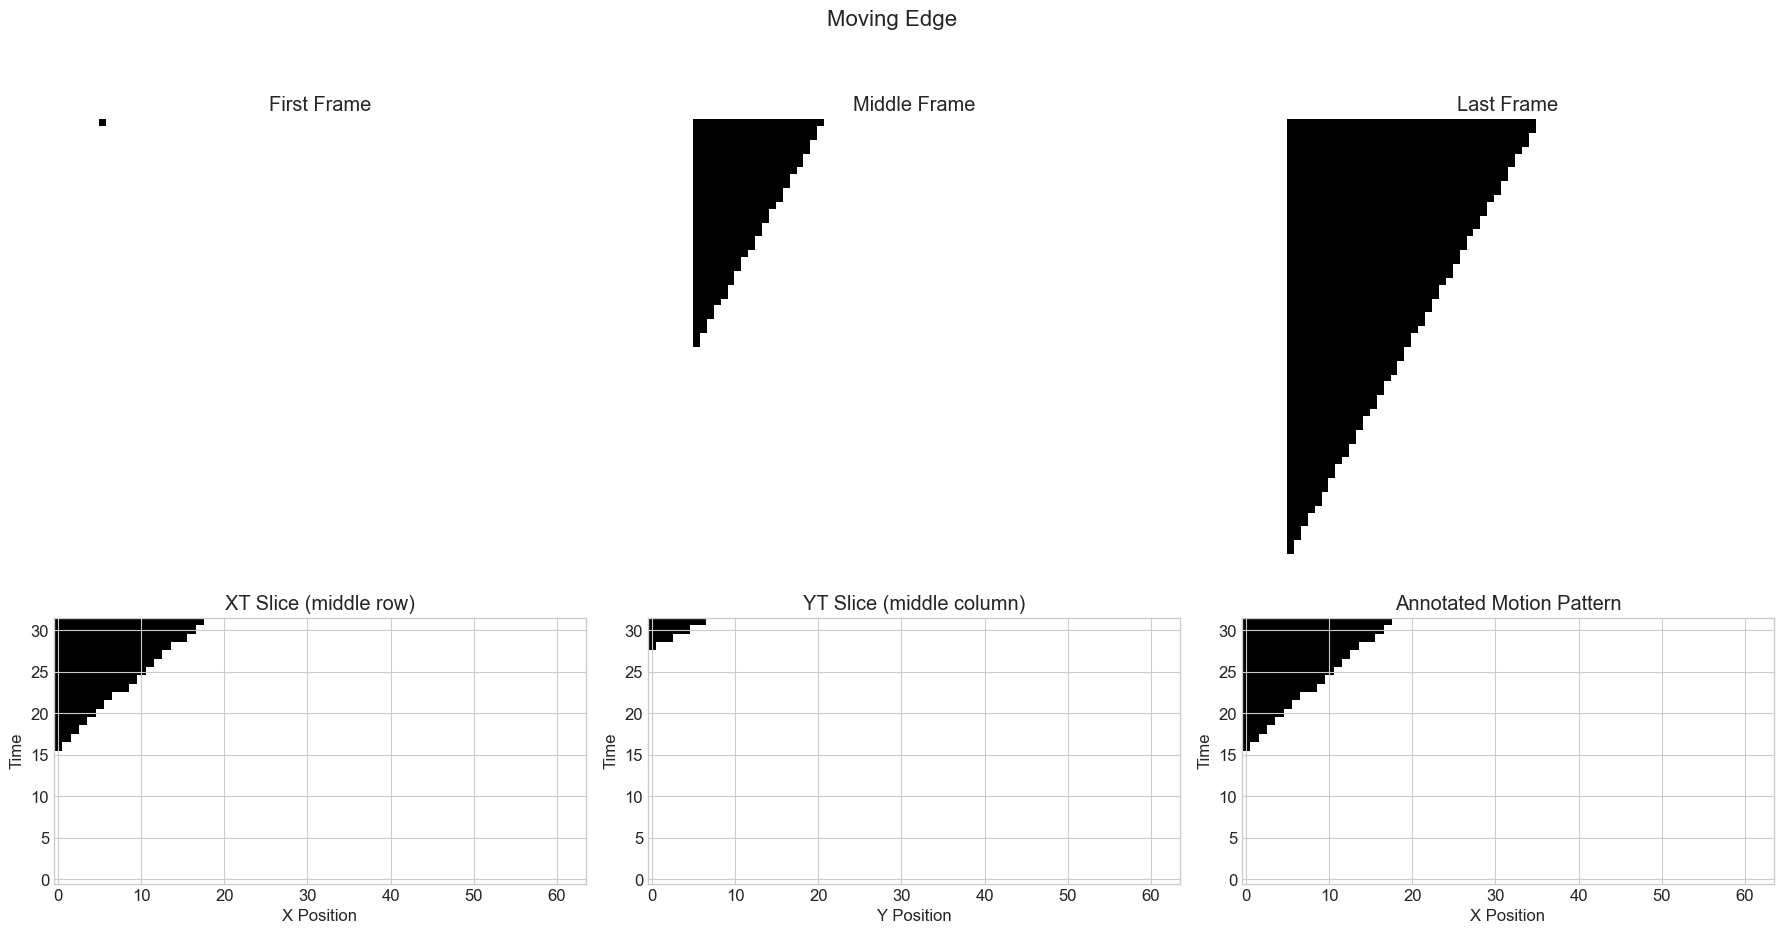

In [7]:
def create_moving_edge(width=64, height=64, n_frames=32, orientation=30, speed=1.0):
    """Create a moving edge with specified orientation and speed."""
    # Create empty volume
    volume = np.zeros((n_frames, height, width))
    
    # Convert orientation to radians
    theta = np.radians(orientation)
    
    # Create coordinate grids
    y, x = np.meshgrid(np.arange(height), np.arange(width), indexing='ij')
    
    # For each frame, draw the edge
    for t in range(n_frames):
        # Calculate offset based on time and speed
        offset = t * speed
        
        # Create the edge: white on one side, black on the other
        # The edge is defined by the equation: x*cos(θ) + y*sin(θ) = offset
        volume[t] = (x * np.cos(theta) + y * np.sin(theta) > offset).astype(float)
    
    return volume

# Create and analyze a moving edge
edge_stimulus = create_moving_edge(orientation=30, speed=1.0)
analyze_motion(edge_stimulus, 'Moving Edge')

The aperture problem arises because local measurements of motion (through a small aperture) can only detect the component of motion perpendicular to the edge's orientation. In spatiotemporal space, this appears as ambiguity in the orientation of structures.

This is why in the xt and yt slices, the motion signature of the edge is different from what we've seen with a simple moving bar. The pattern depends on where we slice the volume relative to the edge orientation.

## 4. Analyzing Motion in the Frequency Domain

Just as we can analyze spatiotemporal data in the space-time domain, we can also analyze it in the frequency domain using the Fourier transform. The 3D Fourier transform of a spatiotemporal volume gives us a representation in terms of spatial frequencies ($f_x$, $f_y$) and temporal frequency ($f_t$).

In the frequency domain, motion has a distinctive signature: moving patterns have their energy concentrated on a plane through the origin. The orientation of this plane is determined by the velocity of the motion.

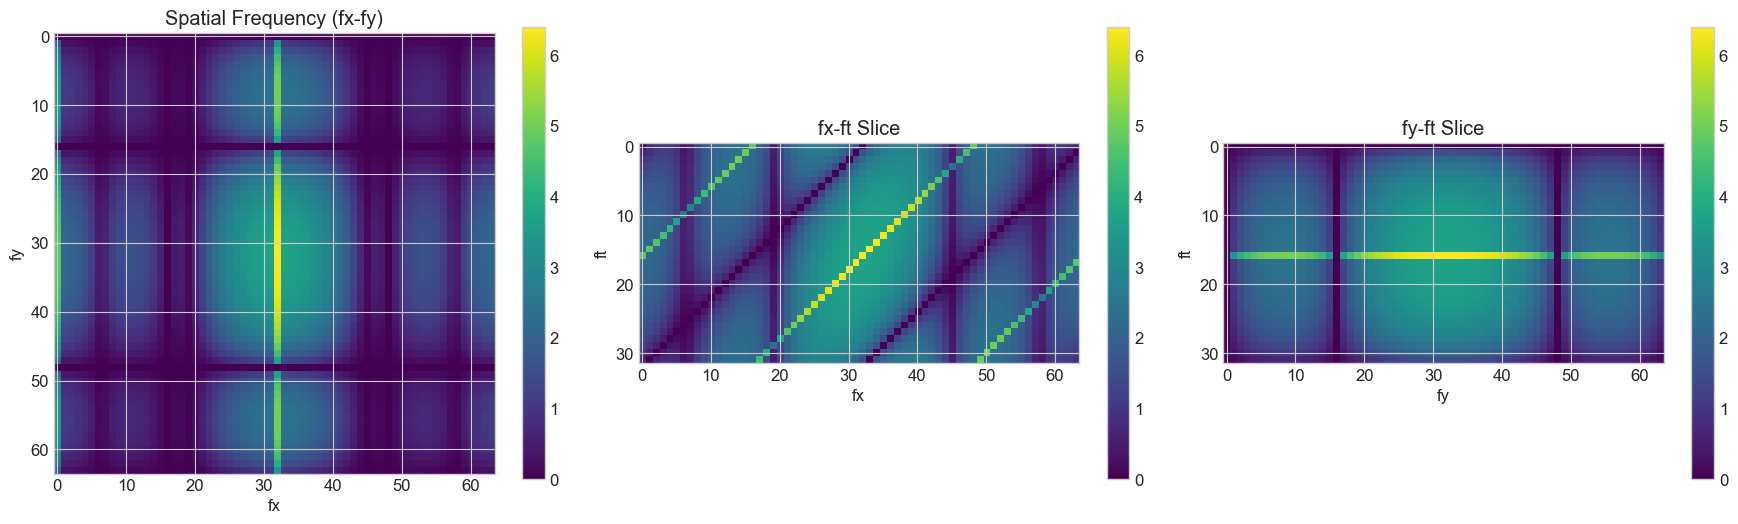

In [8]:
def compute_and_visualize_fourier(volume):
    """Compute and visualize the 3D Fourier transform of a spatiotemporal volume."""
    # Compute 3D FFT
    fft_volume = np.fft.fftshift(np.fft.fftn(volume))
    
    # Compute amplitude spectrum
    amplitude = np.abs(fft_volume)
    
    # Get dimensions
    n_frames, height, width = volume.shape
    
    # Extract middle slices
    fx_fy_slice = amplitude[n_frames//2, :, :]  # Spatial frequency slice
    fx_ft_slice = amplitude[:, height//2, :]    # fx-ft slice
    fy_ft_slice = amplitude[:, :, width//2]     # fy-ft slice
    
    # Visualize slices
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # fx-fy slice
    im0 = axes[0].imshow(np.log1p(fx_fy_slice), cmap='viridis')
    axes[0].set_title('Spatial Frequency (fx-fy)')
    axes[0].set_xlabel('fx')
    axes[0].set_ylabel('fy')
    plt.colorbar(im0, ax=axes[0])
    
    # fx-ft slice
    im1 = axes[1].imshow(np.log1p(fx_ft_slice), cmap='viridis')
    axes[1].set_title('fx-ft Slice')
    axes[1].set_xlabel('fx')
    axes[1].set_ylabel('ft')
    plt.colorbar(im1, ax=axes[1])
    
    # fy-ft slice
    im2 = axes[2].imshow(np.log1p(fy_ft_slice), cmap='viridis')
    axes[2].set_title('fy-ft Slice')
    axes[2].set_xlabel('fy')
    axes[2].set_ylabel('ft')
    plt.colorbar(im2, ax=axes[2])
    
    plt.tight_layout()
    plt.show()

# Analyze rightward motion in the frequency domain
compute_and_visualize_fourier(rightward)

In the frequency domain visualization, you can observe distinct patterns:

1. In the fx-ft slice, you see a diagonal line passing through the origin. This line represents the motion in the x direction, with its slope related to the speed of motion.
2. The fy-ft slice looks different because our stimulus was moving horizontally, with no vertical component.

The key insight is that motion creates a specific structure in the frequency domain: a plane through the origin whose orientation depends on the velocity vector.

## 5. Neural Implementation and Motion Energy Models

The spatiotemporal framework provides a powerful way to understand how the visual system could detect and analyze motion. Direction-selective neurons in the visual cortex can be modeled as filters that respond selectively to certain orientations in spatiotemporal space.

### Spatiotemporal Filters

A spatiotemporal filter is a 3D kernel that, when convolved with a stimulus, responds selectively to certain patterns in space-time. These filters can be designed to be selective for motion in specific directions and at specific speeds.

Here's a simplified representation of a motion-selective filter using a 3D Gabor function:

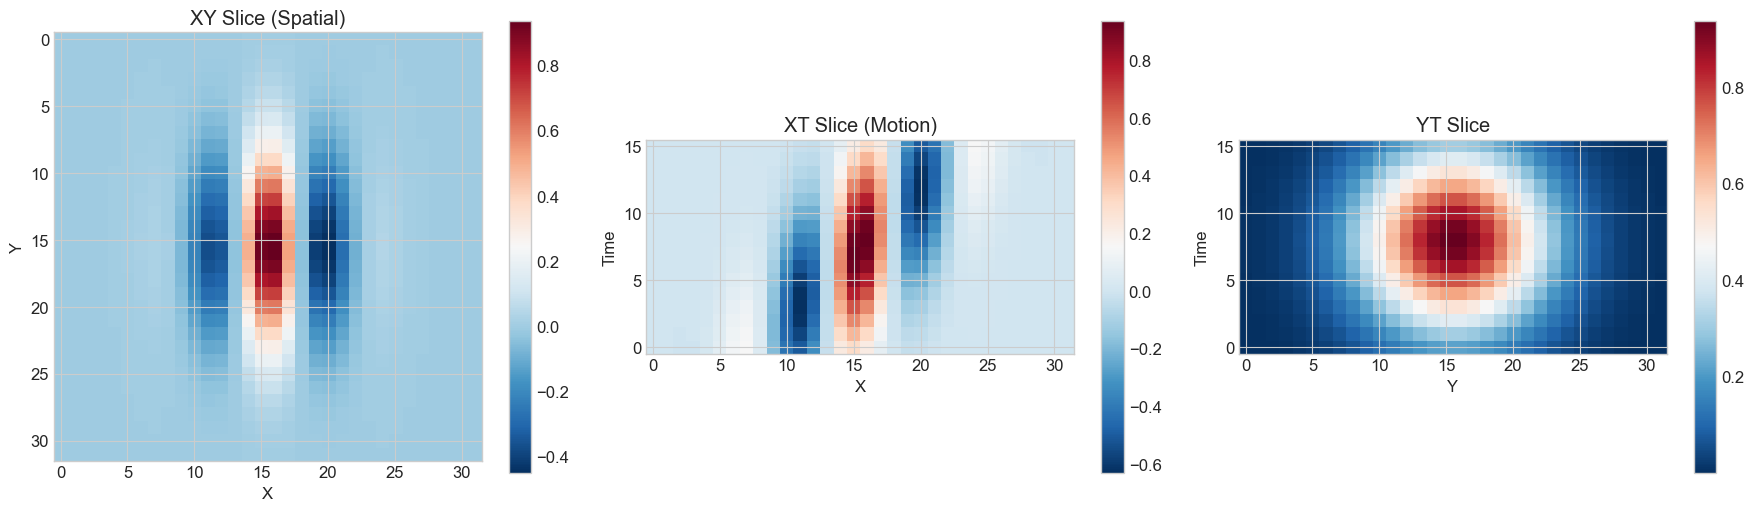

In [9]:
def create_spatiotemporal_filter(size_x=32, size_y=32, size_t=16, direction=0, speed=1.0, spatial_freq=0.1, sigma=5):
    """Create a simplified spatiotemporal filter for motion detection."""
    # Create coordinate grids
    t, y, x = np.meshgrid(
        np.linspace(-size_t//2, size_t//2, size_t),
        np.linspace(-size_y//2, size_y//2, size_y),
        np.linspace(-size_x//2, size_x//2, size_x),
        indexing='ij'
    )
    
    # Convert direction to radians
    theta = np.radians(direction)
    
    # Calculate direction vector
    vx = speed * np.cos(theta)
    vy = speed * np.sin(theta)
    
    # Create tilted coordinate system aligned with the motion
    # This creates a coordinate system where the time axis is tilted in the direction of motion
    # The amount of tilt is determined by the speed
    x_prime = x
    y_prime = y
    t_prime = t - (x * vx + y * vy)  # This creates the orientation in space-time
    
    # Create a 3D Gaussian envelope
    gaussian = np.exp(-(x_prime**2 + y_prime**2 + t_prime**2) / (2 * sigma**2))
    
    # Create a 3D sinusoidal carrier (simplified for visualization)
    carrier = np.cos(2 * np.pi * spatial_freq * (x * np.cos(theta) + y * np.sin(theta)))
    
    # Combine to create the filter
    filter_3d = gaussian * carrier
    
    return filter_3d

# Create a rightward motion filter
rightward_filter = create_spatiotemporal_filter(direction=0, speed=1.0)

# Visualize central slices of the filter
def visualize_filter_slices(filter_3d):
    """Visualize central slices of a 3D filter."""
    size_t, size_y, size_x = filter_3d.shape
    
    # Extract central slices
    xy_slice = filter_3d[size_t//2, :, :]
    xt_slice = filter_3d[:, size_y//2, :]
    yt_slice = filter_3d[:, :, size_x//2]
    
    # Visualize
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    im0 = axes[0].imshow(xy_slice, cmap='RdBu_r')
    axes[0].set_title('XY Slice (Spatial)')
    axes[0].set_xlabel('X')
    axes[0].set_ylabel('Y')
    plt.colorbar(im0, ax=axes[0])
    
    im1 = axes[1].imshow(xt_slice, cmap='RdBu_r', origin='lower')
    axes[1].set_title('XT Slice (Motion)')
    axes[1].set_xlabel('X')
    axes[1].set_ylabel('Time')
    plt.colorbar(im1, ax=axes[1])
    
    im2 = axes[2].imshow(yt_slice, cmap='RdBu_r', origin='lower')
    axes[2].set_title('YT Slice')
    axes[2].set_xlabel('Y')
    axes[2].set_ylabel('Time')
    plt.colorbar(im2, ax=axes[2])
    
    plt.tight_layout()
    plt.show()

# Visualize the filter
visualize_filter_slices(rightward_filter)

The key features of this spatiotemporal filter are:

1. In the xy-slice, it looks like a typical Gabor filter with orientation aligned to the direction of motion
2. In the xt-slice, you see a tilted pattern that matches the orientation of motion in space-time
3. The filter is oriented in the 3D space-time volume to respond maximally to motion in a specific direction and at a specific speed

This tilted orientation in space-time is what allows the filter to detect motion in a specific direction. When this filter is convolved with a spatiotemporal stimulus, it will respond strongly when the stimulus contains motion patterns that match its orientation.

### Connection to the Motion Energy Model

The motion energy model, which we'll explore in more detail in later modules, builds on this spatiotemporal framework. The key components of the model are:

1. **Spatiotemporal Filters**: Filters oriented in space-time to detect motion in specific directions and at specific speeds
2. **Quadrature Pairs**: Pairs of filters that are 90° out of phase, allowing for phase-invariant motion detection
3. **Energy Computation**: Squaring and summing the responses of quadrature pairs to compute motion energy
4. **Opponency**: Comparing responses from filters tuned to opposite directions to enhance direction selectivity

The crucial insight is that motion detection can be implemented through orientation detection in spatiotemporal space. This provides a direct link between computational models and the neural mechanisms of motion perception.

## 6. Biological Connections

The spatiotemporal framework provides a powerful way to understand the neural mechanisms of motion perception. Direction-selective neurons in the visual cortex, particularly in areas V1 and MT, behave in ways that align with this framework.

### Key Biological Connections:

1. **Direction-Selective Cells**: Neurons in V1 and MT that respond selectively to motion in particular directions can be modeled as having receptive fields oriented in spatiotemporal space.

2. **Speed Tuning**: Neurons tuned to different speeds can be modeled as filters with different orientations in space-time, with steeper orientations corresponding to slower speeds.

3. **Receptive Field Structure**: The spatiotemporal structure of receptive fields in motion-sensitive neurons resembles oriented filters in space-time.

4. **Motion Integration**: The integration of local motion signals to perceive global motion can be understood as combining information across different spatiotemporal filters.

5. **The Aperture Problem**: The ambiguity in perceiving motion through a small aperture has a direct correspondence in the spatiotemporal framework and explains certain perceptual phenomena.

These connections highlight how the spatiotemporal framework provides not just a computational approach to motion analysis, but also insights into the biological mechanisms of motion perception.

## 7. Summary

In this section, we've explored the spatiotemporal representation of visual stimuli and how it provides a unified framework for understanding motion. Key takeaways include:

1. **Spatiotemporal Space**: Visual information can be represented in a 3D space combining spatial coordinates (x, y) and time (t).

2. **Motion as Orientation**: In spatiotemporal space, motion appears as oriented structures, with the orientation directly related to the direction and speed of motion.

3. **Space-Time Slices**: Extracting 2D slices from the 3D volume reveals motion trajectories and provides a powerful way to analyze motion patterns.

4. **Velocity Representation**: Velocity is represented by the slope of patterns in space-time, with faster motion creating flatter patterns.

5. **The Aperture Problem**: The ambiguity in perceiving motion through a small aperture has a direct interpretation in spatiotemporal space.

6. **Frequency Domain**: Motion creates distinctive patterns in the frequency domain, with energy concentrated on planes through the origin.

7. **Neural Implementation**: Direction-selective neurons can be modeled as filters oriented in spatiotemporal space, providing a link between computational models and neural mechanisms.

This spatiotemporal framework lays the foundation for the motion energy model, which we'll explore in more detail in subsequent modules. By understanding how motion is represented in space-time, we gain insights into both the computational principles and the neural mechanisms of motion perception.

## 8. Next Steps

Now that you understand the spatiotemporal framework, you're ready to implement these concepts in the exercises. In the exercises, you'll:

1. Create your own 3D spatiotemporal stimuli
2. Extract and analyze space-time slices
3. Estimate velocity from spatiotemporal patterns
4. Build simple motion detectors using spatiotemporal filtering

These exercises will reinforce your understanding of the spatiotemporal framework and prepare you for the motion energy model that we'll cover in later modules.

## 9. References and Further Reading

- Adelson, E. H., & Bergen, J. R. (1985). Spatiotemporal energy models for the perception of motion. *Journal of the Optical Society of America A, 2*(2), 284-299.
- Watson, A. B., & Ahumada, A. J. (1985). Model of human visual-motion sensing. *Journal of the Optical Society of America A, 2*(2), 322-342.
- Simoncelli, E. P., & Heeger, D. J. (1998). A model of neuronal responses in visual area MT. *Vision Research, 38*(5), 743-761.
- DeAngelis, G. C., Ohzawa, I., & Freeman, R. D. (1993). Spatiotemporal organization of simple-cell receptive fields in the cat's striate cortex. II. Linearity of temporal and spatial summation. *Journal of Neurophysiology, 69*(4), 1118-1135.
